# Week 9 




<div style="color:blue;font-style:italic">28.02.2022 - 04.03.2022 </div>


<div style="background-color:rgba(256, 76, 76,0.4)",height="200">

<br>

<H4>Abstract</H4>

<br>

</div>

---

While Bayesian statistics provide deep insights into the parameter space of a certain model, a major drawback are the long execution times. When the same bayesian model is fit to multiple datasets, parallelization of the sampling step might help overcome this drawback. Graphical Processing Units offer an oppertunity to parallelize a large amount of tasks, making attempts to sample a large amount of models simultanously on a GPU an interesting experiment. The developers of pymc recently implemented a jax backend making it possible to run Nuts on the GPU.

---

<div style="background-color:rgba(256, 76, 76,0.4)",height="200">
<br>
<H4>Introduction</H4>
<br>
</div>

---


After developing on methods for feature extraction from data-dependent-acquisition datasets, the next step in a prototype pipeline for a bayesian precursor feature analysis is the data transfer to the model. Bayesian statistics provide deep insights in the
possible parameters of a model, however this comes with rather long sampling runtimes. But since the evaluation of two features can be performed independently, parallelization might help overcome this drawback. Nevertheless we need to keep in mind, that 
the evaluation of a single feature necessarily gives rise to multiple threads corresponding to the number of chains used for convergence control <cite data-cite="GelmanRubin92"></cite>. It is obvious that running multiple feature evaluations parallely - each running e.g. 4 chains parallely - quickly pushes the typical workstation CPU to it's limits.
However graphical processing units (GPU) might be of help here, since they employ a significant higher number of processing cores (e.g.The here used Geforce GTX 1080Ti employing 3584 CUDA cores <cite data-cite="NvidiaGTX1080Ti"></cite>). The probabilistic programming library Pymc <cite data-cite="pymc3"></cite>  comes with a jax backend allowing for sampling bayesian models with NUTS on the GPU. The idea here is not to put on model fit at at time on the GPU but to fit n models simultanously (**Fig. 1**)







---

<div style="background-color:rgba(256, 76, 76,0.4)",height="200">
<br>
<H4>Methods and Material</H4>
<br>
</div>

---

Implementation basis for the reported experiment is the blog article from pymc labs published in december 2021. pymc ceo T. Wiecki reports a speed up in sampling by execution on GPU. 

Basis model is a normal distribution


---

<div style="background-color:rgba(256, 76, 76,0.4)",height="200">
<br>
<H4>Results</H4>
<br>
</div>

---






<div style="background-color:rgba(256, 76, 76,0.4)",height="200">
<br>
<H4>Conclusion and Outlook</H4>
<br>
</div>


---

Lorem ipsum


---

<div style="background-color:rgba(256, 76, 76,0.4)",height="200">
<br>
<H4>References</H4>
<br>
</div>


---

Lorem ipsum


---

<div style="background-color:rgba(256, 76, 76,0.4)",height="200">
<br>
<H4>To Do</H4>
<br>
</div>


---


+ CPU breakdown for bigger models in pymc4
+ Put GLM model in pystoms
+ Model Evaluation for GLM in pystoms
+ Parallelized GLM model
+ Feature Evaluation Manager
+ Test Model on GPU


---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [3]:
CPU = pd.read_csv("data/dataCPUD310.csv",index_col=0)
GPU = pd.read_csv("data/dataGPUD310.csv",index_col=0)

In [6]:
GPU

D1   D2  D3    GPU_times   GPUv_times  Model_build_times
0  640    1  10  5533.299187  2937.242950           2.373700
1   64   10  10  1064.418569   635.294347           0.054022
2   32   20  10   706.487763   472.834575           0.104229
3   16   40  10   476.422270   378.841688           0.199790
4    8   80  10   346.796392   334.466776           0.392063
5    4  160  10   352.092704   430.540143           0.759313
6    2  320  10   272.473488   367.375130           1.569888
7    1  640  10   985.415023   421.705749           3.048243

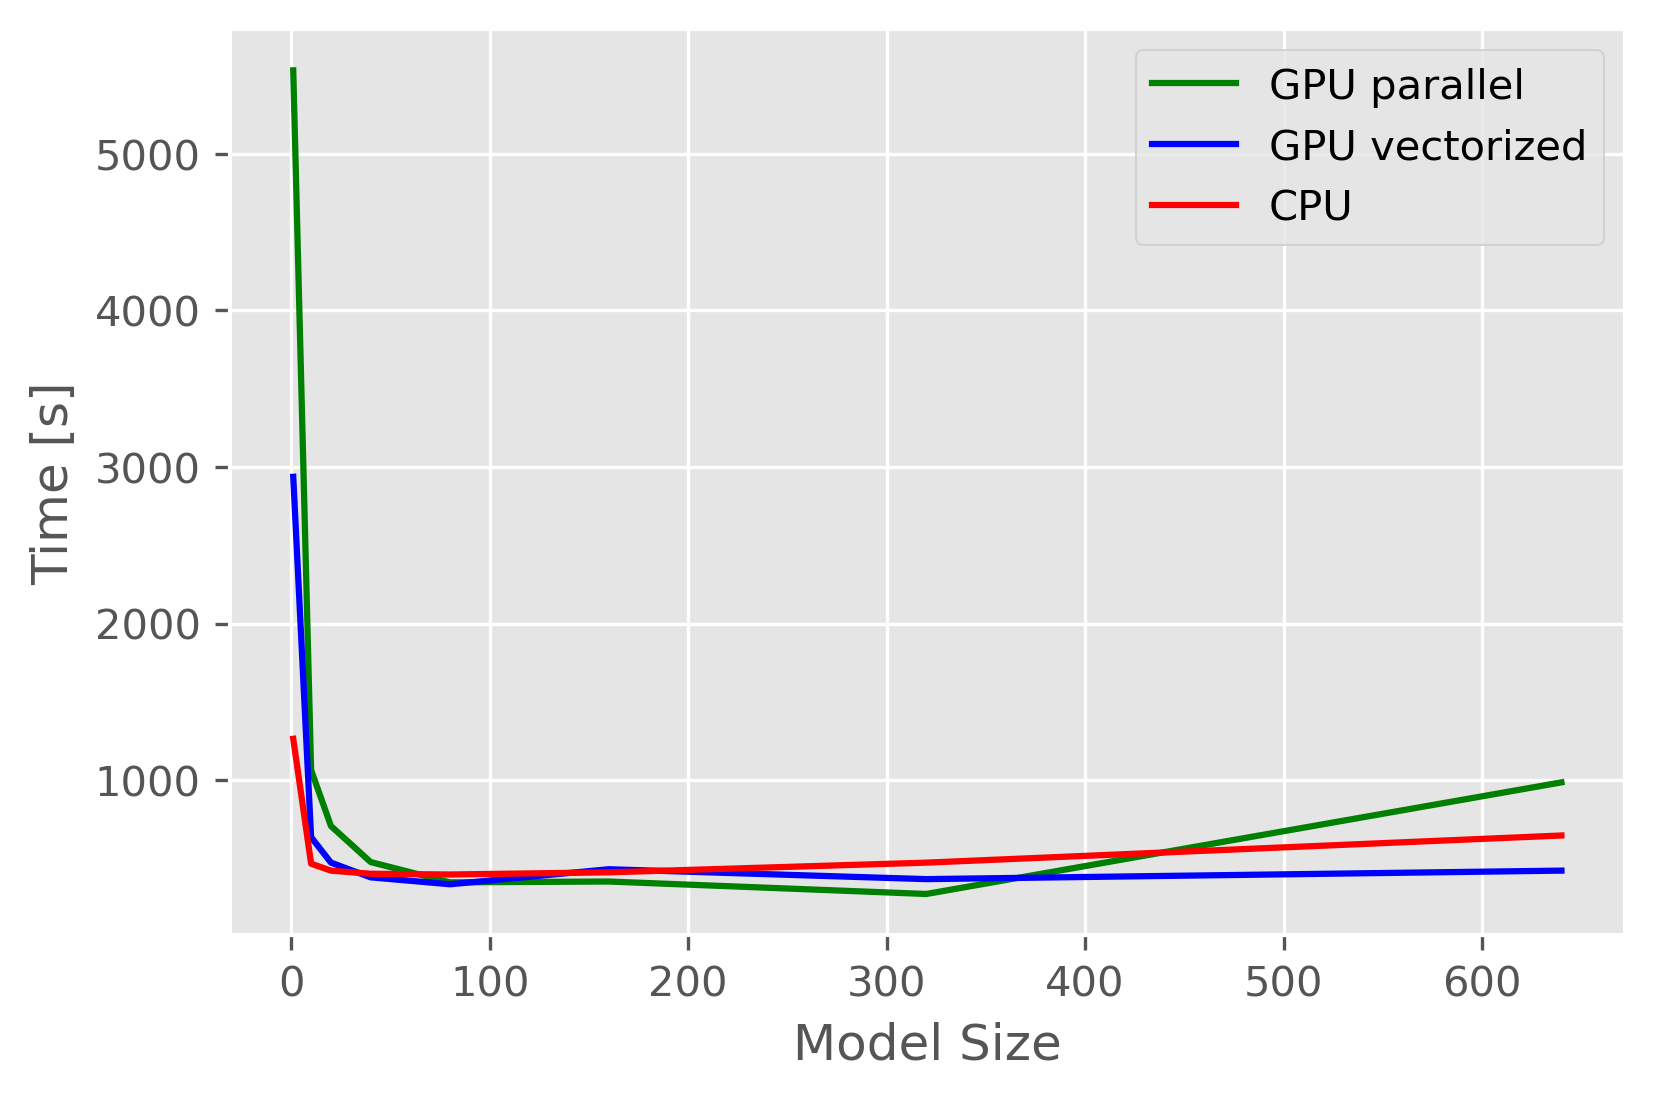

In [22]:
D2 = GPU.D2
Fig, ax = plt.subplots()
Fig.set_dpi(300)
ax.plot(D2,GPU.GPU_times,label="GPU parallel",color="green")
ax.plot(D2,GPU.GPUv_times,label="GPU vectorized",color="blue")
ax.plot(D2,CPU.CPU_times,label="CPU",color="red")
ax.set_xlabel("Model Size")
ax.set_ylabel("Time [s]")
ax.legend()
plt.show()


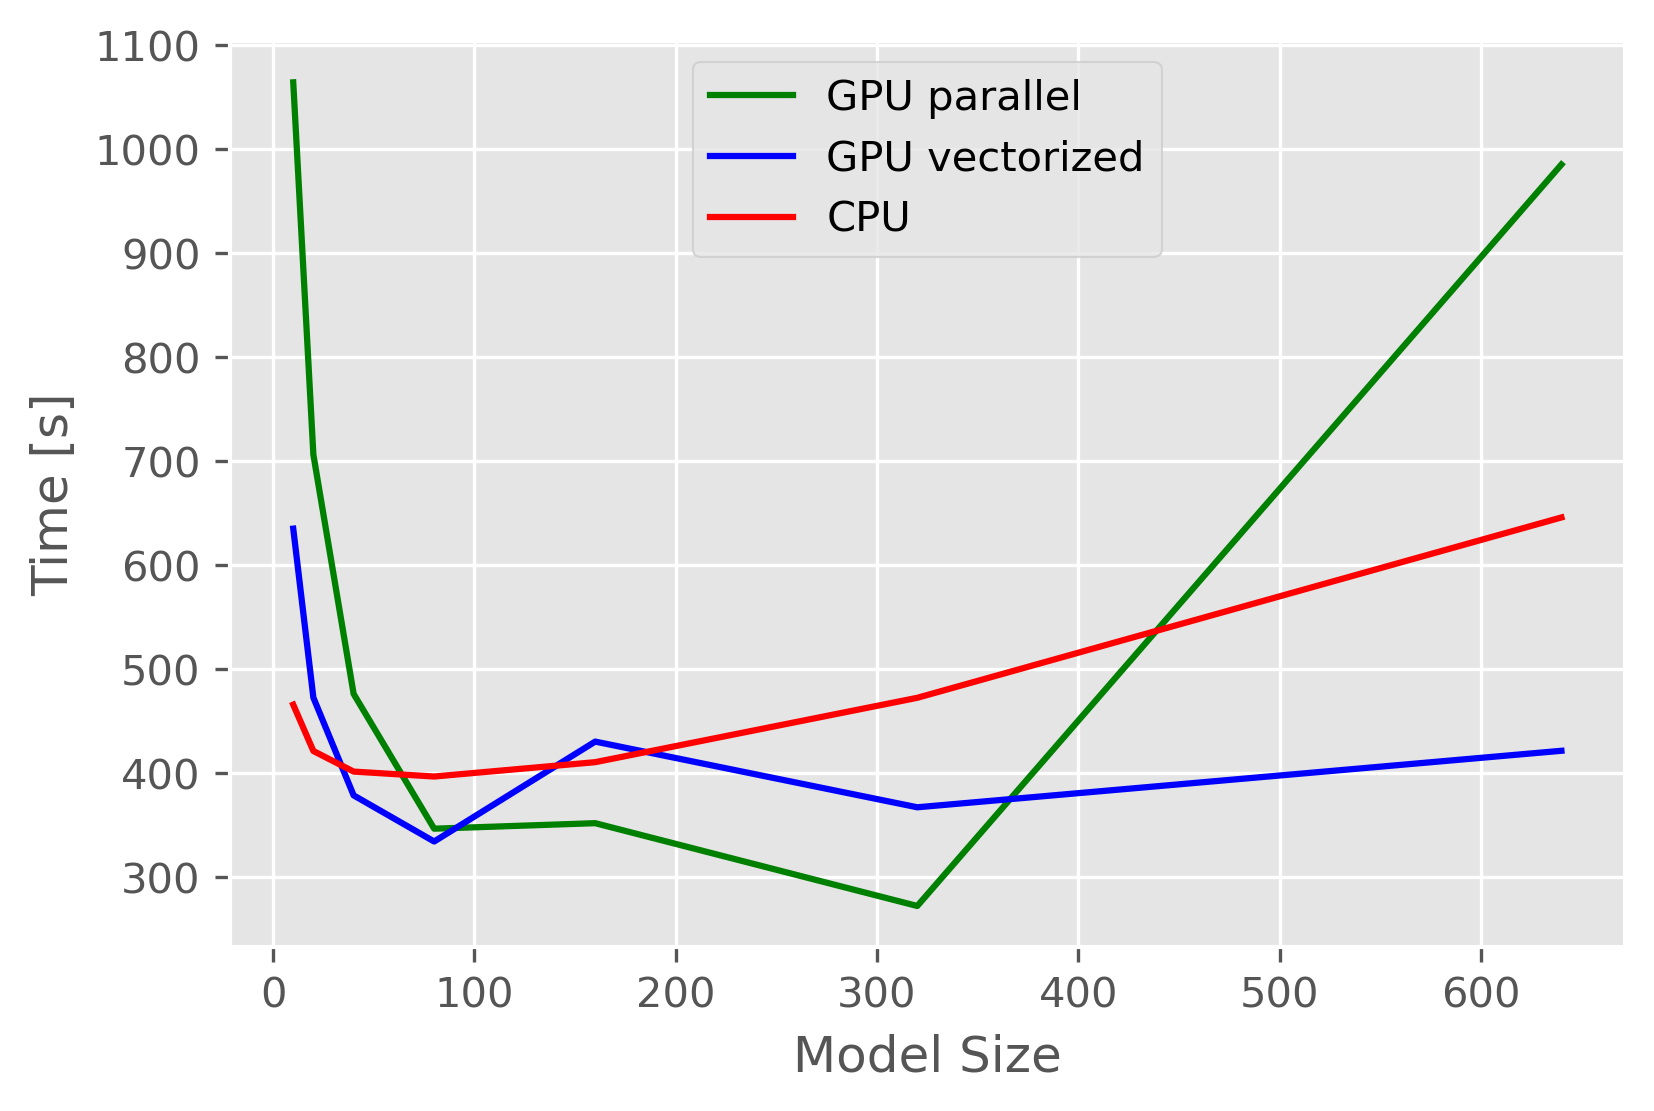

In [25]:
D2 = GPU.D2[1:]
Fig, ax = plt.subplots()
Fig.set_dpi(300)
ax.plot(D2,GPU.GPU_times[1:],label="GPU parallel",color="green")
ax.plot(D2,GPU.GPUv_times[1:],label="GPU vectorized",color="blue")
ax.plot(D2,CPU.CPU_times[1:],label="CPU",color="red")
ax.set_xlabel("Model Size")
ax.set_ylabel("Time [s]")
ax.legend()
plt.show()
